In [1]:
import pandas as pd
from nltk.stem.porter import PorterStemmer

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('/content/Restaurant_Reviews 1.tsv', delimiter = '\t', quoting =3)

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.shape

(1000, 2)

In [6]:
df["Review"][0]

'Wow... Loved this place.'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
import re
import string

In [9]:
corpus = []
for i in range(0,1000):
  review = re.sub(pattern = '[^a-zA-Z]', repl =' ', string =df['Review'][i])
  review= review.lower()
  review_word = review.split()
  review_word = [word for word in review_word if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review1 = [ps.stem(word) for word in review_word]
  review = ' '.join(review1)
  corpus.append(review)

In [10]:
corpus[:1000]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [11]:
df.shape

(1000, 2)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)

In [13]:
df['Review']

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone.
997,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ..."


In [14]:
X = cv.fit_transform(corpus).toarray()

In [15]:
X.shape

(1000, 1500)

In [16]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
X[0].max()

1

In [18]:
y= df.iloc[:,1].values

In [19]:
y.shape

(1000,)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=104)

In [22]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [23]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [24]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

BernoulliNB()

In [25]:
y_predG = clf1.predict(X_test)
y_predM = clf2.predict(X_test)
y_predB = clf3.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_predG)

0.665

In [28]:
accuracy_score(y_test,y_predM)

0.785

In [29]:
accuracy_score(y_test,y_predB)

0.785

In [30]:
print("Gussian",accuracy_score(y_test,y_predG))
print("Multinomial",accuracy_score(y_test,y_predM))
print("Bernoulli",accuracy_score(y_test,y_predB))

Gussian 0.665
Multinomial 0.785
Bernoulli 0.785


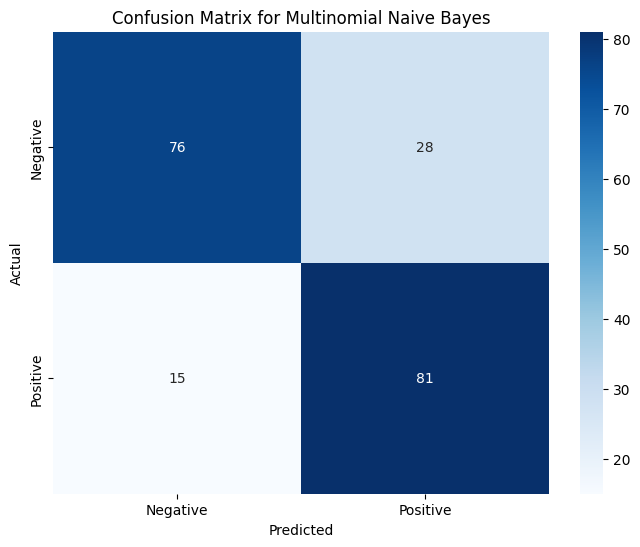

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predM)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()


ExtraTreesClassifier Accuracy: 0.74


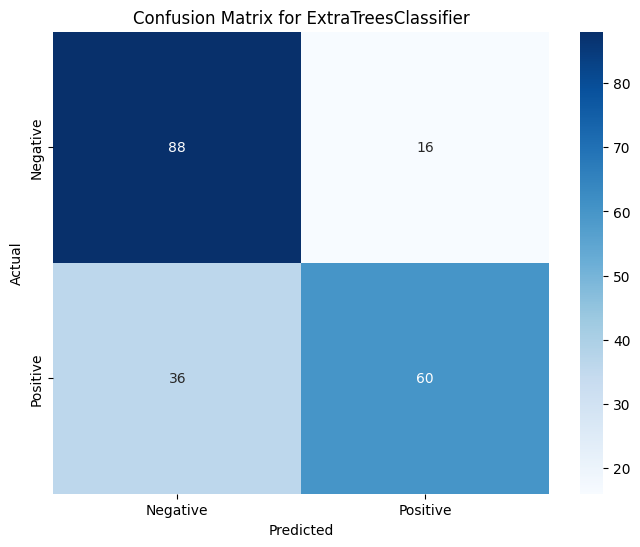

In [34]:

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)

etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, y_pred_etc)
print(f"ExtraTreesClassifier Accuracy: {accuracy_etc}")

cm_etc = confusion_matrix(y_test, y_pred_etc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_etc, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ExtraTreesClassifier')
plt.show()


XGBoost Classifier Accuracy: 0.75


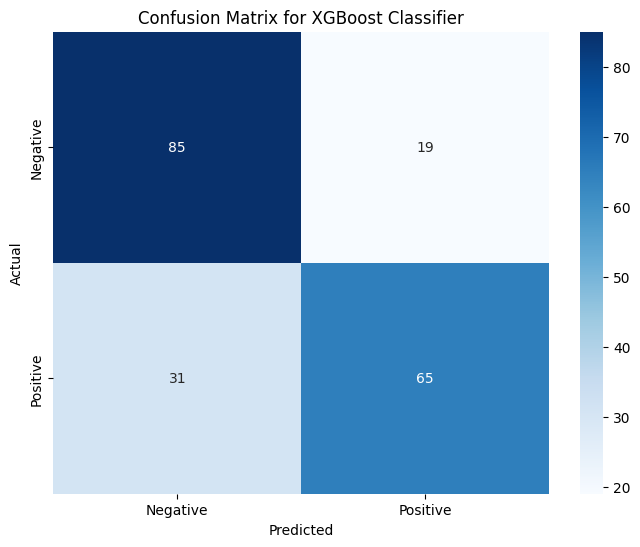

In [44]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

RandomForestClassifier Accuracy: 0.745


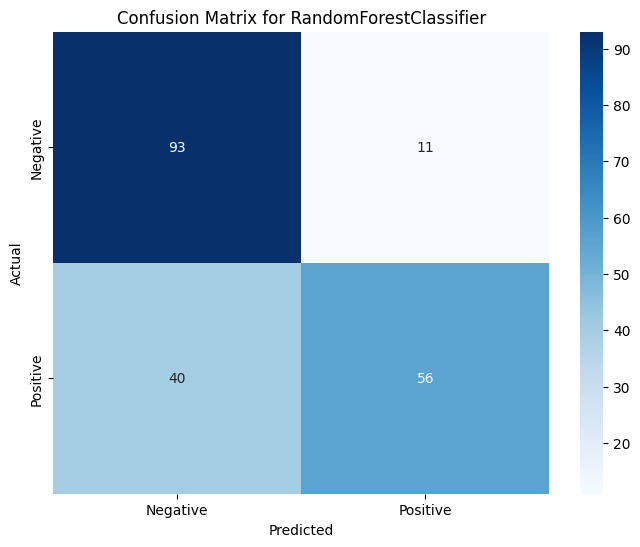

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"RandomForestClassifier Accuracy: {accuracy_rfc}")

cm_rfc = confusion_matrix(y_test, y_pred_rfc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Gussian 0.65
Multinomial 0.765
Bernoulli 0.785


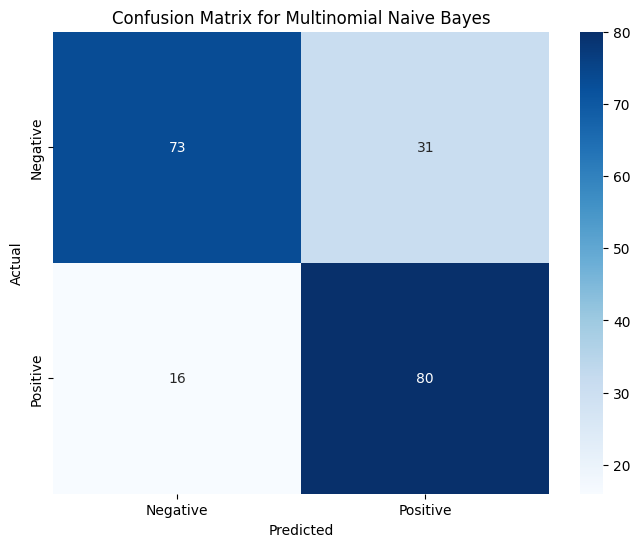

In [37]:
import pandas as pd
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

df = pd.read_csv('/content/Restaurant_Reviews 1.tsv', delimiter = '\t', quoting =3)

corpus = []
for i in range(0,1000):
  review = re.sub(pattern = '[^a-zA-Z]', repl =' ', string =df['Review'][i])
  review= review.lower()
  review_word = review.split()
  review_word = [word for word in review_word if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  review1 = [ps.stem(word) for word in review_word]
  review = ' '.join(review1)
  corpus.append(review)

tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform(corpus).toarray()
y= df.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=104)

clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

y_predG = clf1.predict(X_test)
y_predM = clf2.predict(X_test)
y_predB = clf3.predict(X_test)

print("Gussian",accuracy_score(y_test,y_predG))
print("Multinomial",accuracy_score(y_test,y_predM))
print("Bernoulli",accuracy_score(y_test,y_predB))

cm = confusion_matrix(y_test, y_predM)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

In [41]:
import pandas as pd
from nltk.stem.porter import PorterStemmer

df_rfid = pd.read_csv('/content/Restaurant_Reviews 1.tsv', delimiter='\t', on_bad_lines='skip')

def process_rfid(rfid_tag):
    processed_data = f"Processed: {rfid_tag}"
    return processed_data

df_rfid['processed_rfid'] = df_rfid['Review'].apply(process_rfid)

print(df_rfid)

def is_valid_rfid(rfid_tag):
    return len(str(rfid_tag)) == 10 and str(rfid_tag).isdigit()

df_rfid['valid'] = df_rfid['Review'].apply(is_valid_rfid)
df_rfid

                                                Review  Liked  \
0                             Wow... Loved this place.      1   
1                                   Crust is not good.      0   
2            Not tasty and the texture was just nasty.      0   
3    Stopped by during the late May bank holiday of...      1   
4    The selection on the menu was great and so wer...      1   
..                                                 ...    ...   
995  I think food should have flavor and texture an...      0   
996                           Appetite instantly gone.      0   
997  Overall I was not impressed and would not go b...      0   
998  The whole experience was underwhelming, and I ...      0   
999  Then, as if I hadn't wasted enough of my life ...      0   

                                        processed_rfid  
0                  Processed: Wow... Loved this place.  
1                        Processed: Crust is not good.  
2    Processed: Not tasty and the texture was ju

,Review,Liked,processed_rfid,valid
0,Wow... Loved this place.,1,Processed: Wow... Loved this place.,False
1,Crust is not good.,0,Processed: Crust is not good.,False
2,Not tasty and the texture was just nasty.,0,Processed: Not tasty and the texture was just ...,False
3,Stopped by during the late May bank holiday of...,1,Processed: Stopped by during the late May bank...,False
4,The selection on the menu was great and so wer...,1,Processed: The selection on the menu was great...,False
...,...,...,...,...
995,I think food should have flavor and texture an...,0,Processed: I think food should have flavor and...,False
996,Appetite instantly gone.,0,Processed: Appetite instantly gone.,False
997,Overall I was not impressed and would not go b...,0,Processed: Overall I was not impressed and wou...,False
998,"The whole experience was underwhelming, and I ...",0,Processed: The whole experience was underwhelm...,False
